In [20]:
%pylab inline
import matplotlib.pyplot as plt
from numpy import vectorize

Populating the interactive namespace from numpy and matplotlib


In [35]:
arr=[]
def ef(x):
    return m1*x +((m0-m1)/2)*(abs(x+E)-abs(x-E))
 
# Derivada del voltaje de C1
def dv1(v1,v2,i):
    return ((v2-v1)-R*ef(v1))/(R*C1)
# Derivada del voltaje de C2
def dv2(v1,v2,i):
    return ((v1-v2)+R*i)/(R*C2)
# Derivada de la corriente
def di(v1,v2,i):
    return -v2/(L)
def funci(n,s):
    dt = s
    nsteps = n
    # Condiciones iniciales
    v10 = 1.1
    v20 = 0
    i00 = 0
    # Guarda el estado 
    arr = []
    for i in range(nsteps):
        # Guarda el avance
        arr.append([v10,v20,i00])
        # Pasos intermedios runge kutta 4
        k1 = dv1(v10,v20,i00)
        k2 = dv2(v10,v20,i00)
        k3 = di(v10,v20,i00)
        k11 = dv1(v10+(k1*dt/2.),v20+(k2*dt/2.),i00+(k3*dt/2.))
        k22 = dv2(v10+(k1*dt/2.),v20+(k2*dt/2.),i00+(k3*dt/2.))
        k33 = di(v10+(k1*dt/2.),v20+(k2*dt/2.),i00+(k3*dt/2.))
        k111 = dv1(v10+(k11*dt/2.),v20+(k22*dt/2.),i00+(k33*dt/2.))
        k222 = dv2(v10+(k11*dt/2.),v20+(k22*dt/2.),i00+(k33*dt/2.))
        k333 =  di(v10+(k11*dt/2.),v20+(k22*dt/2.),i00+(k33*dt/2.))
        k1111 = dv1(v10+(k111*dt),v20+(k222*dt),i00+(k333*dt))
        k2222 = dv2(v10+(k111*dt),v20+(k222*dt),i00+(k333*dt))
        k3333 =  di(v10+(k111*dt),v20+(k222*dt),i00+(k333*dt))
        #print k1,k2,k3
        # Actualiza el vector inicial al siguiente time-step
        v10 = v10 + dt*(k1 + 2*k11 + 2*k111 + k1111)/6.
        v20 = v20 + dt*(k2 + 2*k22 + 2*k222 + k2222)/6.
        i00 = i00 + dt*(k3 + 2*k33 + 2*k333 + k3333)/6.
    return arr
    
def graficar(arr,Re):
    arr = np.array(arr)
    plt.figure()
    
    plt.plot(arr.T[0], arr.T[1])
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.ylabel(r"$V_2(V)$", fontsize = 27)
    plt.xlabel(r"$V_1(V)$", fontsize = 27)
    plt.title(b"$V_1\ Vs\ V_2\ para\ R= "+str(Re)+"k \Omega $", fontsize = 27)
    #for tick in plt.xaxis.get_major_ticks():
     #               tick.label.set_fontsize(20) 
    #for tick in ax.yaxis.get_major_ticks():
      #              tick.label.set_fontsize(20) 
                    # specify integer or one of preset strings, e.g.
                    #tick.label.set_fontsize('x-small') 
    plt.savefig('simulacion3.jpg')
    
        #arr = np.array(arr)

8e-09 1.03e-07 0.018 -103125.0 -54987.5


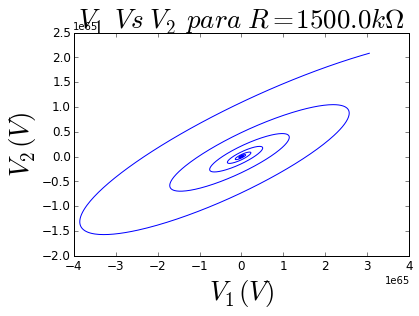

In [36]:
# Constantes
'''
R = 1000
C1 = 64e-6
C2 = 1000e-6
L = (35e-6)
m0 = -0.114e-2
m1 = -0.071e-2
E = 1.
print 1/(R*C1), 1/(R*C2), 1/L, R*m0, R*m1
'''
R = 1500.
C1 = 8e-9
C2 = 103e-9
L = 18e-3
m0 = -0.825e-3
m1 = -0.4399e-3
E = 0.99
print (C1), (C2), L, m0/C1, m1/C1
#print 1/(15.7*C1)
#print 1/(R*C1), 1/(R*C2), (1./L),1/C2


graficar(funci(60000,0.000001),R)



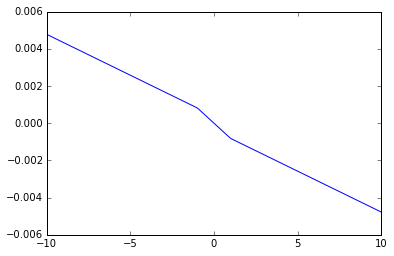

In [21]:
# Verifica la funcion de corriente del circuito de chu
r = linspace(-10,10,200)
plot(r, ef(r))
#print g(1)

1e-08 1e-07 0.018 -77000.0 -42000.0


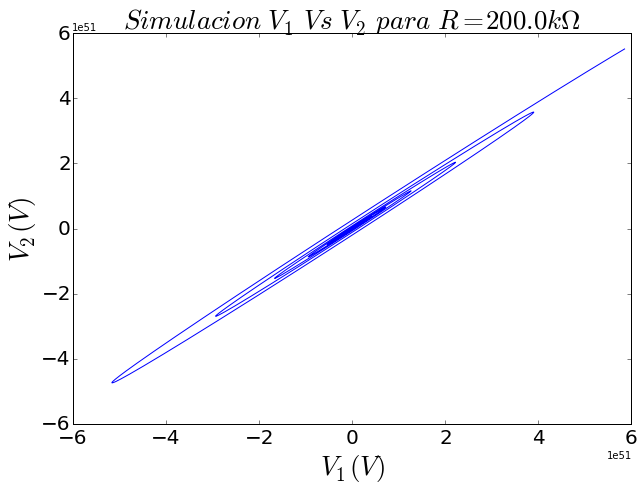

In [19]:
R = 200.0
C1 = 10.0e-9
C2 = 100.0e-9
L = 18.0e-3
m0 = -0.77e-3
m1 = -0.42e-3
E = 1.
print (C1), (C2), L, m0/C1, m1/C1
#print 1/(15.7*C1)
#print 1/(R*C1), 1/(R*C2), (1./L),1/C2
graficar(funci(60000,0.000001),R)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


AttributeError: 'list' object has no attribute 'T'

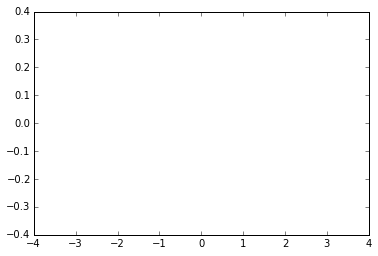

In [16]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%pylab

# = plt.figure()
#ax = fig.add_axes([0, 0, 1, 1], projection='3d')
fig, ax = plt.subplots()
ax.set_xlim([-4,4])
ax.set_ylim([-0.4,0.4])
line, = ax.plot(arr.T[0,0], arr.T[1,0]
                ,'-')
                #, arr.T[2,0], '-')
pt,   = ax.plot(arr.T[0,0], arr.T[1,0]
               ,'o')
                #, arr.T[2,0], 'o')


def animate(j):
    i = (100*j)%nsteps
    line.set_xdata(arr.T[0][:i])  # update the data
    line.set_ydata(arr.T[1][:i])  # update the data
    #line.set_3d_properties(arr.T[2][:i])  # update the data
    pt.set_xdata(arr.T[0][i])  # update the data
    pt.set_ydata(arr.T[1][i])  # update the data
    #pt.set_3d_properties(arr.T[2][i])  # update the data

    return line,pt

#Init only required for blitting to give a clean slate.
def init():
    line.set_xdata(arr.T[0][0])  # update the data
    line.set_ydata(arr.T[1][0])  # update the data
    #line.set_3d_properties(arr.T[2][0])  # update the data
    pt.set_xdata(arr.T[0][0])  # update the data
    pt.set_ydata(arr.T[1][0])  # update the data
    #pt.set_3d_properties(arr.T[2][0])  # update the data
    return line,pt

ani = animation.FuncAnimation(fig, animate,frames = int(nsteps/100.), init_func=init,
    interval=0.1, blit=True)
plt.show()
#ani.save('lorentz_attractor.mp4', fps=15)


In [24]:
print arr.T[2,5]

AttributeError: 'list' object has no attribute 'T'

In [25]:
arr= array([arr[i] for i in 2*np.arange(0,60000/32.,1)])

TypeError: list indices must be integers, not numpy.float64

In [104]:
np.arange(0,nsteps,1)

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [40]:
"""
A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%pylab

def update_lines(j) :
    i = (620*j)%(nsteps-1)
    line.set_data(arr.T[0:2, :i])
    line.set_3d_properties(arr.T[2,:i])
    pt.set_data(arr.T[0:2, i])
    pt.set_3d_properties(arr.T[2,i])
    
    ax.view_init(30, 0.0007 * i)
    return line,pt

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)
# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
line, = ax.plot(arr.T[0, 0:1], arr.T[1, 0:1], arr.T[2, 0:1])
pt, = ax.plot(arr.T[0, 0:1], arr.T[1, 0:1], arr.T[2, 0:1], 'o')


# Setting the axes properties
ax.set_xlim3d([-3, 3])
ax.set_xlabel('X')

ax.set_ylim3d([-0.4, 0.4])
ax.set_ylabel('Y')
ax.view_init(30, 0)

ax.set_zlim3d([-4, 4])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, frames = int(nsteps/2000),
                              interval=10, blit=False)

writer = animation.writers['ffmpeg']
writer = writer(fps=20, metadata=dict(artist='Me'), bitrate=10800)
line_ani.save(u'video.mp4',writer=writer)
plt.show()

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


8e-09 1.03e-07 0.018 -103125.0 -54987.5


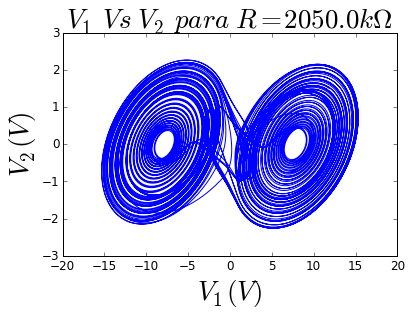

In [34]:
# Constantes
'''
R = 1000
C1 = 64e-6
C2 = 1000e-6
L = (35e-6)
m0 = -0.114e-2
m1 = -0.071e-2
E = 1.
print 1/(R*C1), 1/(R*C2), 1/L, R*m0, R*m1
'''
R = 2050.
C1 = 8e-9
C2 = 103e-9
L = 18e-3
m0 = -0.825e-3
m1 = -0.4399e-3
E = 0.99
print (C1), (C2), L, m0/C1, m1/C1
#print 1/(15.7*C1)
#print 1/(R*C1), 1/(R*C2), (1./L),1/C2


graficar(funci(60000,0.000001),R)


